# Preprocess and visualization of FBI NIBRS database

You'll find the entire database [here](https://www.dolthub.com/repositories/Liquidata/fbi-nibrs/data/main) to help to visualize the entire data.

The downloaded data comes from the [**FBI Crime Data Explorer**](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads).


## Preprocessing

It is needed to do a preprocessing on each state folder in order to have only lowercase in the folder and label name. The function `preprocess_files_in_directory()` directly modify the folder name and labels in each file.

### Alabama, as a first example

In [2]:
import os
import pandas as pd
import sys


sys.path.append(os.path.abspath("../data/"))

from FBI_preprocess_folder import preprocess_files_in_directory

# Define the base directory where Alabama data is stored
state_dir = '../../data/RAW/Alabama'

# Run the function to preprocess all files in the Alabama directory
preprocess_files_in_directory(state_dir)


Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_prop_desc_type.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_weapon_type.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_assignment_type.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/ref_race.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_arrest_type.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_suspected_drug.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_age.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_injury.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_arrestee.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_victim_injury.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_prop_loss_type.csv
Processed columns in file: ../../data/RAW/Alabama/AL-2015/nibrs_ethnicity.csv
Processed columns in file: ../../data/RAW/Alabama/AL

### Merging interesting data

In [3]:
import os
import pandas as pd
import sys


sys.path.append(os.path.abspath("../data/"))

from FBI_merging import process_state_data

# Define the base directory where Alabama data is stored
state_dir = '../../data/RAW/Alabama'

# Define the output file
output_file = os.path.join(state_dir, 'Alabama_merged_data.csv')

# Process data for the state and save it
final_data = process_state_data(state_dir, output_file)


Data processed and saved to ../../data/RAW/Alabama/Alabama_merged_data.csv


In [4]:
final_data

,incident_id,incident_date,offense_type_id,arrestee_id,weapon_id,victim_id,injury_id,circumstances_id,year
0,77774048,2015-12-09 00:00:00,41,NaN,NaN,84717875,NaN,NaN,2015
1,77774049,2015-12-09 00:00:00,7,22258255.0,1.0,84717876,NaN,NaN,2015
2,77774050,2015-12-09 00:00:00,23,22258256.0,1.0,84717877,NaN,NaN,2015
3,77774051,2015-12-09 00:00:00,47,NaN,NaN,84717878,NaN,NaN,2015
4,77774052,2015-12-09 00:00:00,49,NaN,NaN,84717879,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...
577541,64306,1991-12-18 00:00:00,14,NaN,NaN,64306,NaN,NaN,1991
577542,64305,1991-12-19 00:00:00,14,NaN,NaN,64305,NaN,NaN,1991
577543,64303,1991-12-21 00:00:00,45,NaN,NaN,64303,NaN,NaN,1991
577544,64302,1991-12-23 00:00:00,49,NaN,NaN,64302,NaN,NaN,1991


### Some investigations

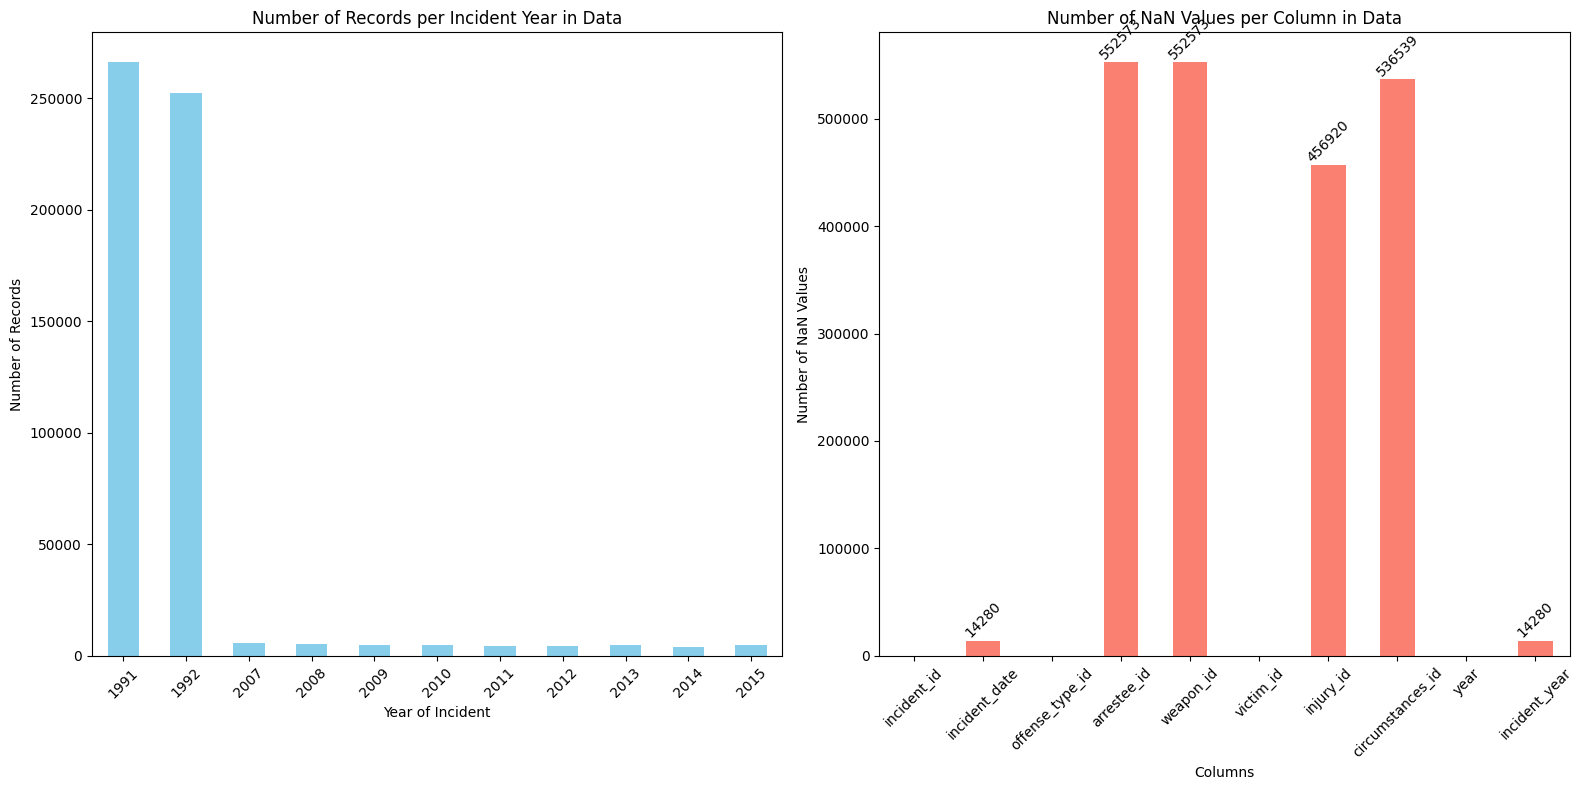

In [14]:
import os
import pandas as pd
import sys
import importlib

sys.path.append(os.path.abspath("../data/"))

import FBI_analysis

importlib.reload(FBI_analysis)

from FBI_analysis import analyze_incidents_and_missing_values

# Analyze and visualize the incidents and missing values per column
analyze_incidents_and_missing_values(final_data, 'incident_date', verbose=False)

#### Analysis Summary
From the bar plots, we observe the following:

1. **Data concentration in 1991 and 1992:**
   - The majority of the data is concentrated in the years 1991 and 1992, with very limited data for other years. This may limit the temporal analysis but provides a strong starting point for studying patterns in these two years.
   - Further investigation across other states might help fill in data gaps for a more comprehensive view.
2. **Missing `incident_date` values:**
   - A few `incident_date` values are missing, specifically 14280. Despite these missing dates, the remaining data is largely complete.
3. **Availability of `offense_type_id`:**
    - All offense types are available, which is good for categorizing offenses based on our criteria for violence. This will help us to classify offenses and filter incidents related to violent behavior.
4. **Missing Data for Specific Parameters:**
    - Four key columns (`arrestee_id`, `weapon_id`, `injury_id`, and `circumstances_id`) show a significant number of missing values, as indicated in the NaN count plot.
    - We hope additional data from other states can fill in some of these gaps. However, since offense types are available, we can still proceed with classification based on offenses alone.
5. **Insights on Weapons and Injuries:**
    - The weapon_id and injury_id columns, though missing some values, provide information on the type and severity of violence. While this missing data presents some limitations, the existing offense data could compensate.

So, despite some missing values in specific columns, the precise date of the incident, the available offense data and partial details on weapons and injuries can provide a solid foundation for analyzing violent incidents. We can refine our approach further as more data becomes available from additional states.

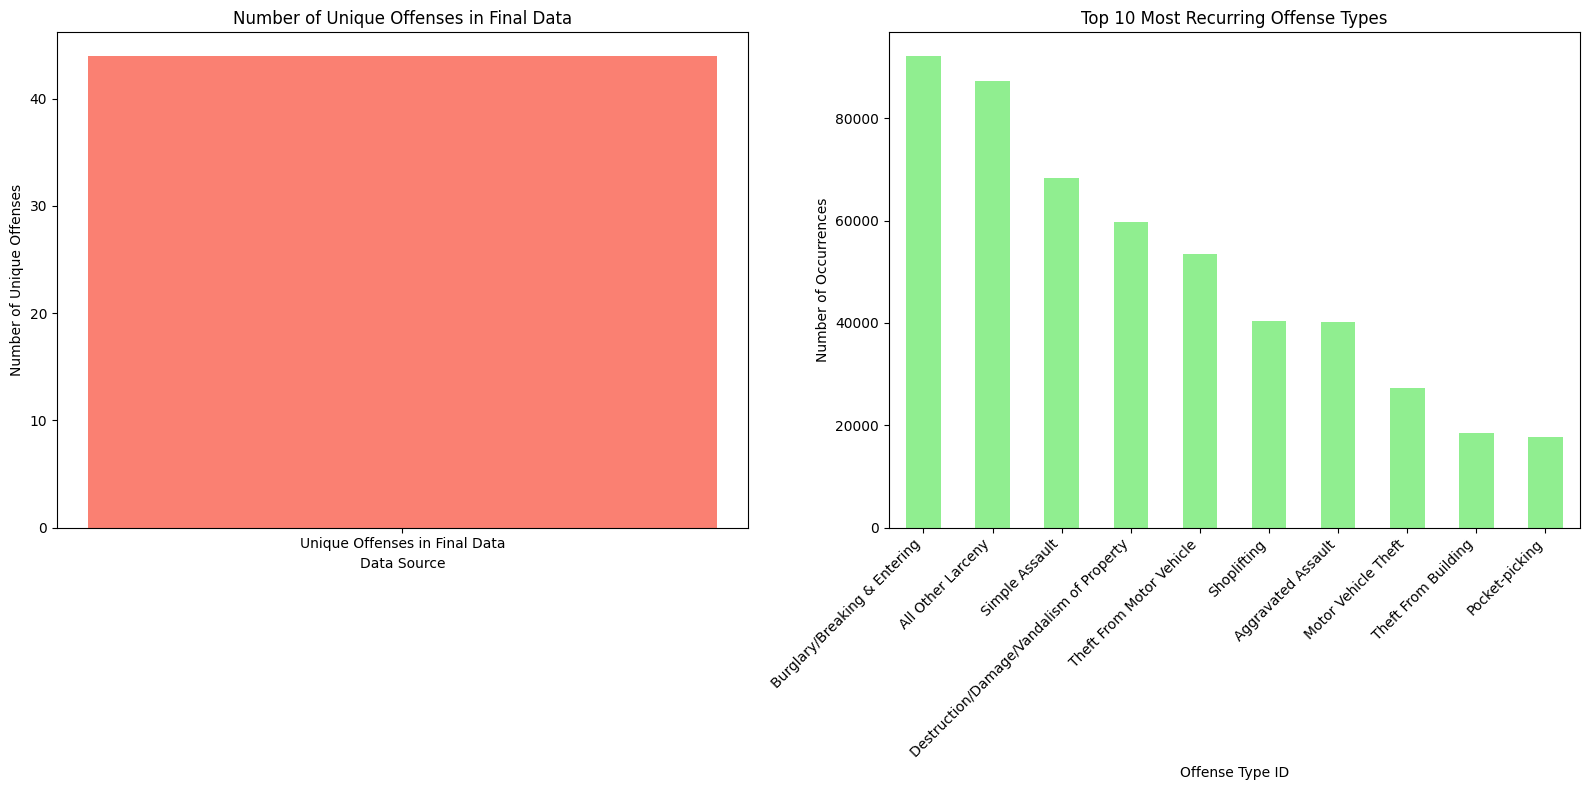

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append(os.path.abspath("../plots_helper/"))

from FBI_analysis import analyze_offenses

# Define the base directory where Alabama data is stored
base_dir = '../../data/RAW/Alabama'
state_prefix = 'AL'

# Analyze and visualize the offenses
analyze_offenses(final_data, base_dir, state_prefix, verbose=False)



#### Analysis of Offense Types

From the bar plots, we can say:

1. **Unique offense types in `State_merged_data`:**
    - The first plot shows the number of unique offense types present in the `State_merged_data`, in our example Alabama. We observe that a subset of approximately 45 unique offenses is available in the data.
    - This means that the majority of incidents fall into well-defined and recurring offense categories. It will help us to categorize incidents reliably based on these established classifications.
2. **Top 10 Most Frequent Offense Types:**
    - The second plot displays the top 10 most frequently cited offense types in the dataset, along with their occurrence counts. Offenses like *Burglary/Breaking & Entering*, *All Other Larceny*, and *Simple Assault* are the most common.
    - These recurring offenses serve as strong indicators for our analysis, particularly for categorizing incidents as violent or non-violent.
  
In summary, the offenses available in the NIBRS data for Alabama are not only varied but also recurrent, which provides a reliable basis for violent incident classification. The top 10 offenses illustrate the primary incident types and should help us for further analysis focused on identifying patterns of violent behavior.

### Washington case

In [ ]:
sys.path.append(os.path.abspath("../data/"))

from FBI_preprocess_folder import preprocess_files_in_directory

# Define the base directory where Alabama data is stored
state_dir = '../../data/RAW/Washington'

# Run the function to preprocess all files in the Alabama directory
preprocess_files_in_directory(state_dir)

Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_prop_desc_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_weapon_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_assignment_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/ref_race.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_arrest_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_suspected_drug.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_age.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_injury.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_arrestee.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_victim_injury.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_prop_loss_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_ethnicity.csv
Processed column

/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/data/FBI_preprocess_folder.py:52: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(new_file_path)


Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_incident.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_drug_measure_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/ref_state.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_property.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_victim_circumstances.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_activity_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_circumstances.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_cleared_except.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_offense.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_criminal_act_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_offender.csv
Processed columns in file: ../../data/RAW/Washington/WA-2016/nibrs_arrestee_weap

/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/data/FBI_preprocess_folder.py:52: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(new_file_path)


Processed columns in file: ../../data/RAW/Washington/WA-2012/nibrs_incident.csv
Processed columns in file: ../../data/RAW/Washington/WA-2012/nibrs_drug_measure_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2012/cde_agencies.csv
Processed columns in file: ../../data/RAW/Washington/WA-2012/ref_state.csv
Processed columns in file: ../../data/RAW/Washington/WA-2012/nibrs_property.csv
Processed columns in file: ../../data/RAW/Washington/WA-2012/nibrs_victim_circumstances.csv
Processed columns in file: ../../data/RAW/Washington/WA-2012/nibrs_activity_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2012/nibrs_circumstances.csv
Processed columns in file: ../../data/RAW/Washington/WA-2012/nibrs_cleared_except.csv
Processed columns in file: ../../data/RAW/Washington/WA-2012/nibrs_offense.csv
Processed columns in file: ../../data/RAW/Washington/WA-2012/nibrs_criminal_act_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2012/agency_participation.

/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/data/FBI_preprocess_folder.py:52: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(new_file_path)


Processed columns in file: ../../data/RAW/Washington/WA-2013/nibrs_incident.csv
Processed columns in file: ../../data/RAW/Washington/WA-2013/nibrs_drug_measure_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2013/cde_agencies.csv
Processed columns in file: ../../data/RAW/Washington/WA-2013/ref_state.csv
Processed columns in file: ../../data/RAW/Washington/WA-2013/nibrs_property.csv
Processed columns in file: ../../data/RAW/Washington/WA-2013/nibrs_victim_circumstances.csv
Processed columns in file: ../../data/RAW/Washington/WA-2013/nibrs_activity_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2013/nibrs_circumstances.csv
Processed columns in file: ../../data/RAW/Washington/WA-2013/nibrs_cleared_except.csv
Processed columns in file: ../../data/RAW/Washington/WA-2013/nibrs_offense.csv
Processed columns in file: ../../data/RAW/Washington/WA-2013/nibrs_criminal_act_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2013/agency_participation.

/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/data/FBI_preprocess_folder.py:52: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(new_file_path)


Processed columns in file: ../../data/RAW/Washington/WA-2007/nibrs_incident.csv
Processed columns in file: ../../data/RAW/Washington/WA-2007/nibrs_drug_measure_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2007/cde_agencies.csv
Processed columns in file: ../../data/RAW/Washington/WA-2007/ref_state.csv
Processed columns in file: ../../data/RAW/Washington/WA-2007/nibrs_property.csv
Processed columns in file: ../../data/RAW/Washington/WA-2007/nibrs_victim_circumstances.csv
Processed columns in file: ../../data/RAW/Washington/WA-2007/nibrs_activity_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2007/nibrs_circumstances.csv
Processed columns in file: ../../data/RAW/Washington/WA-2007/nibrs_cleared_except.csv
Processed columns in file: ../../data/RAW/Washington/WA-2007/nibrs_offense.csv
Processed columns in file: ../../data/RAW/Washington/WA-2007/nibrs_criminal_act_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2007/agency_participation.

/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/data/FBI_preprocess_folder.py:52: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(new_file_path)


Processed columns in file: ../../data/RAW/Washington/WA-2008/nibrs_incident.csv
Processed columns in file: ../../data/RAW/Washington/WA-2008/nibrs_drug_measure_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2008/cde_agencies.csv
Processed columns in file: ../../data/RAW/Washington/WA-2008/ref_state.csv
Processed columns in file: ../../data/RAW/Washington/WA-2008/nibrs_property.csv
Processed columns in file: ../../data/RAW/Washington/WA-2008/nibrs_victim_circumstances.csv
Processed columns in file: ../../data/RAW/Washington/WA-2008/nibrs_activity_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2008/nibrs_circumstances.csv
Processed columns in file: ../../data/RAW/Washington/WA-2008/nibrs_cleared_except.csv
Processed columns in file: ../../data/RAW/Washington/WA-2008/nibrs_offense.csv
Processed columns in file: ../../data/RAW/Washington/WA-2008/nibrs_criminal_act_type.csv
Processed columns in file: ../../data/RAW/Washington/WA-2008/agency_participation.

In [9]:
import os
import pandas as pd
import sys


sys.path.append(os.path.abspath("../data/"))

from FBI_merging import process_state_data

# Define the base directory where Alabama data is stored
state_dir = '../../data/RAW/Washington'

# Define the output file
output_file = os.path.join(state_dir, 'Washington_merged_data.csv')

# Process data for the state and save it
washington_final_data = process_state_data(state_dir, output_file)


/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/data/FBI_merging.py:21: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/data/FBI_merging.py:21: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/data/FBI_merging.py:21: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/data/FBI_merging.py:21: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/data/FBI_merging.py:21: DtypeWarning: Colu

Data processed and saved to ../../data/RAW/Washington/Washington_merged_data.csv


/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/plots_helper/FBI_analysis.py:119: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[date_column] = pd.to_datetime(data[date_column], errors='coerce')


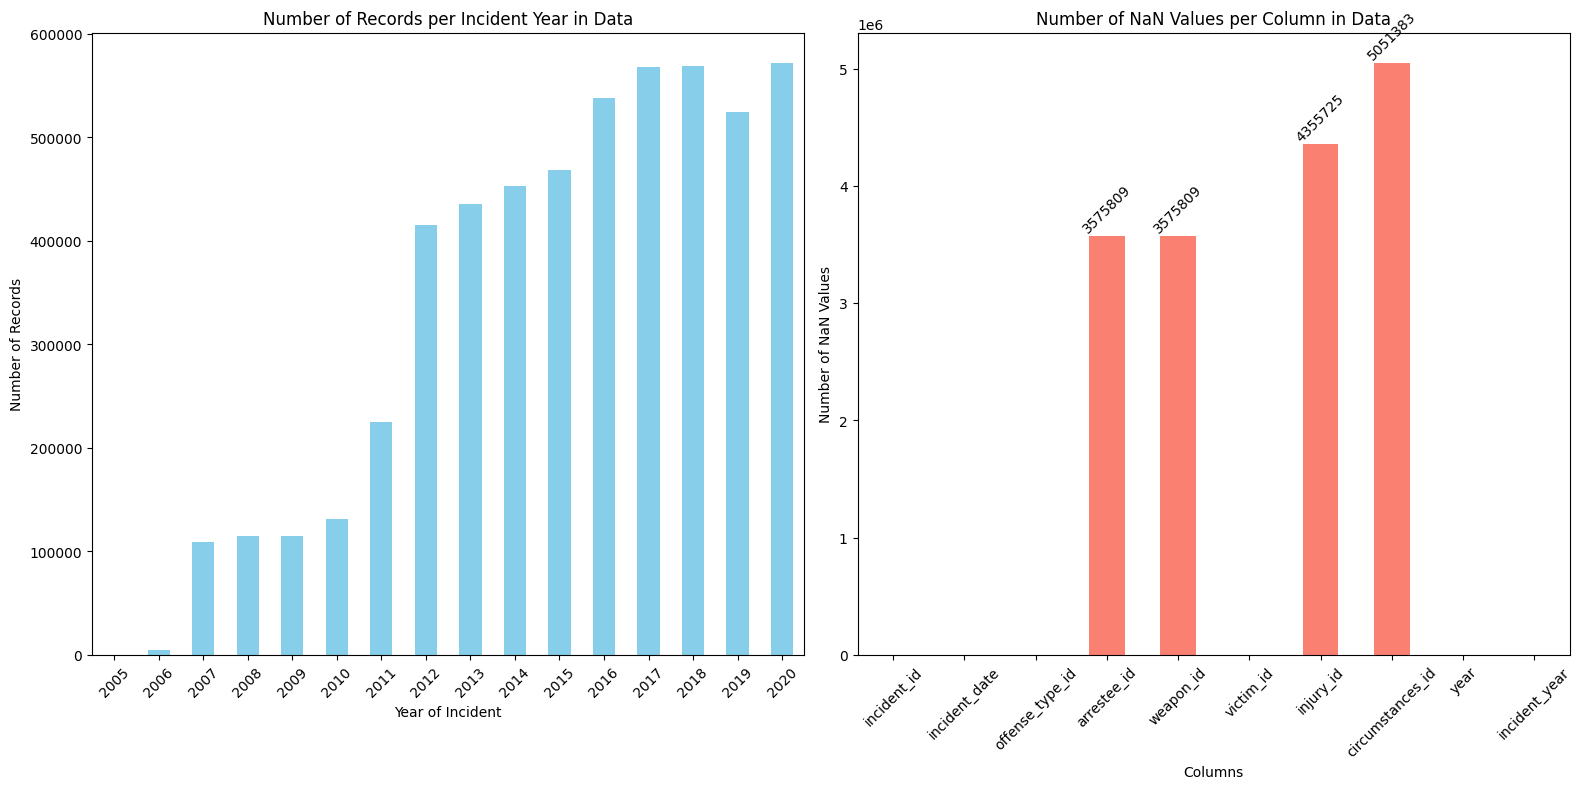

In [13]:
import os
import pandas as pd
import sys
import importlib

sys.path.append(os.path.abspath("../data/"))

import FBI_analysis

importlib.reload(FBI_analysis)

from FBI_analysis import analyze_incidents_and_missing_values

# Analyze and visualize the incidents and missing values per column
analyze_incidents_and_missing_values(washington_final_data, 'incident_date', verbose=False)

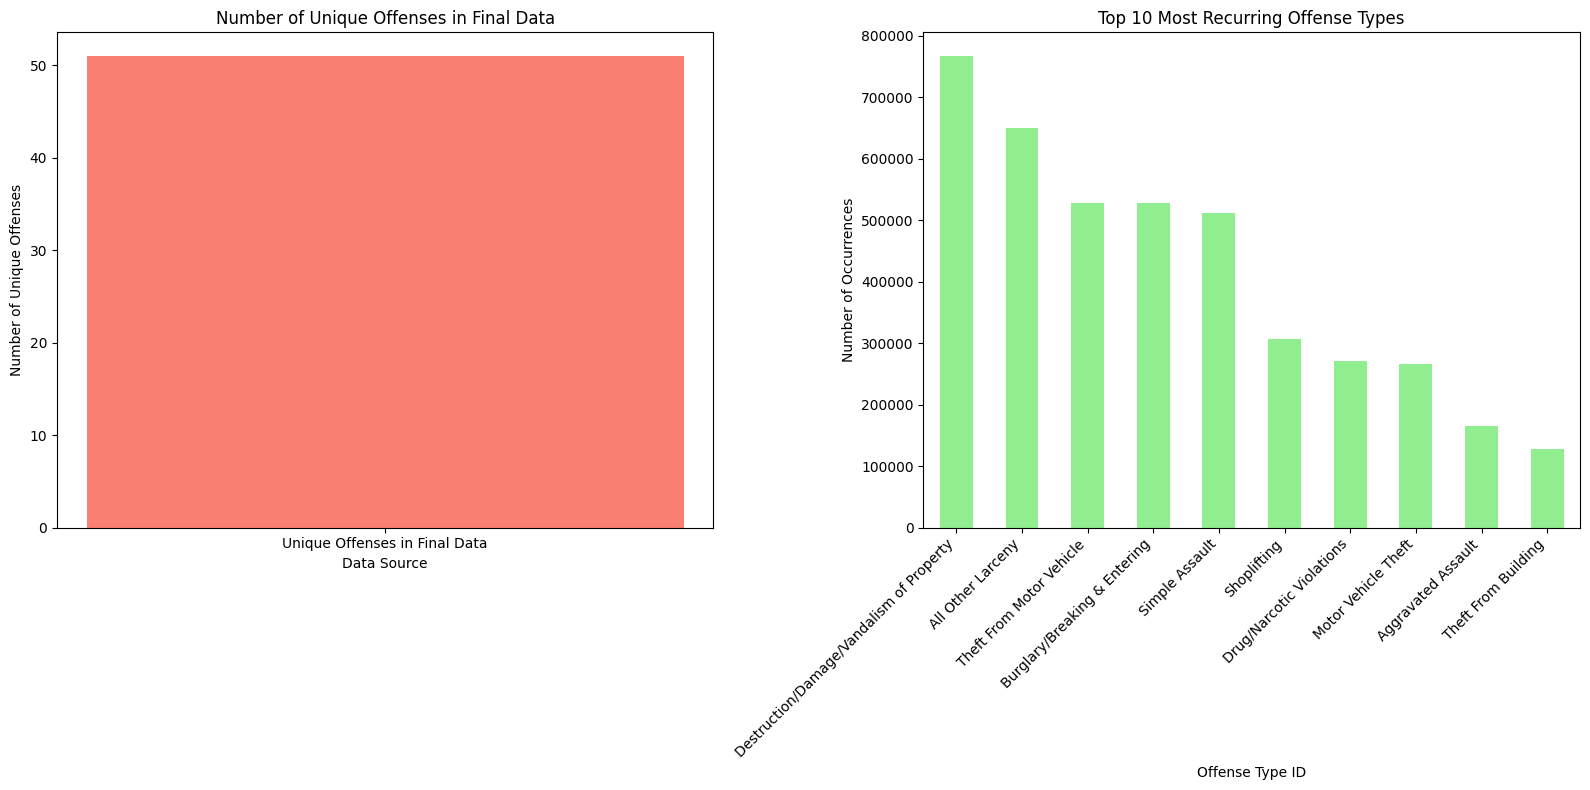

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append(os.path.abspath("../plots_helper/"))

from FBI_analysis import analyze_offenses

# Define the base directory where Alabama data is stored
base_dir = '../../data/RAW/Washington'
state_prefix = 'WA'

# Analyze and visualize the offenses
analyze_offenses(washington_final_data, base_dir, state_prefix, verbose=False)